**Introduction to Seaborn**

In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
%matplotlib inline # đảm bảo figure của seaborn luôn nằm trong này

UsageError: unrecognized arguments: # đảm bảo figure của seaborn luôn nằm trong này


In [ ]:
print(sns.get_dataset_names())  # tên của tập dữ liệu mà seaborn có sẵn

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


**Styling**


In [ ]:
sns.set_theme() # Apply the default theme

**Numerical Plots  **
* Distribution: Hist, KDE (Kernel Density Estimate)
* Bar Plot
* Count Plot
* Facet Plot: tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành hàng và cột
* Box Plot: phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tư của chúng
* Join Plot
* Pair Plot
* Heat Map: một kĩ thuật trực quan hóa dữ liệu cho thấy cường độ của một hiện tượng là màu sắc ở hai chiều


**Distribution Plot**
* Univariate distribution of observations: quan sát trong 1 biến duy nhất

In [ ]:
tips_df = sns.load_dataset('tips')

In [ ]:
tips_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [ ]:
sns.histplot(data = tips_df["total_bill"]);

In [ ]:
tips_df["total_bill"].value_counts().sort_values(ascending = False)

total_bill
13.42    3
7.25     2
21.01    2
20.69    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64

**KDE Plot**

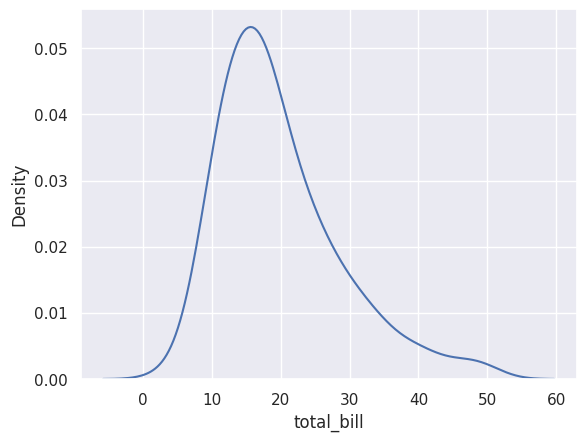

In [ ]:
sns.kdeplot(data = tips_df['total_bill']);

**Displot **: sự kết hợp giữa histogram và kde

In [ ]:
sns.displot(data = tips_df, x = 'total_bill', col = 'time', kde = True); # dùng time khi muốn tách ra hai thời gian

**Categorial Plots **

**Bar Plots**

In [ ]:
tips_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

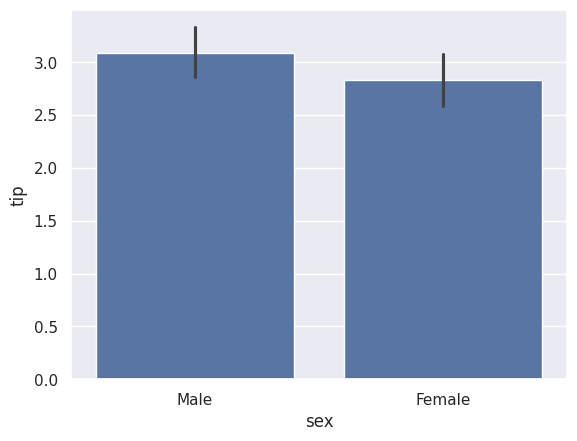

In [ ]:
sns.barplot(data = tips_df, x = 'sex', y='tip', estimator = np.mean);

**Count Plot **

In [ ]:
tips_df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

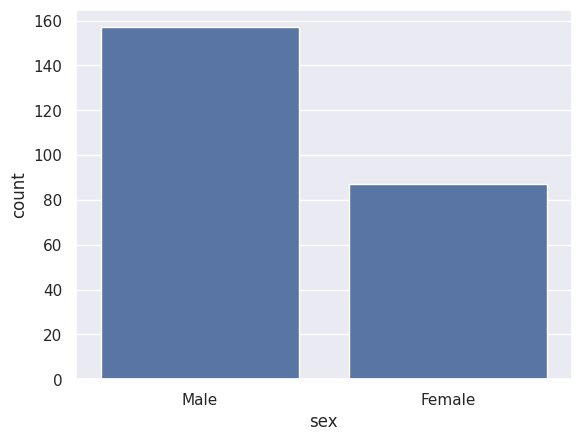

In [ ]:
sns.countplot(data=tips_df, x = 'sex');

**Box Plot**

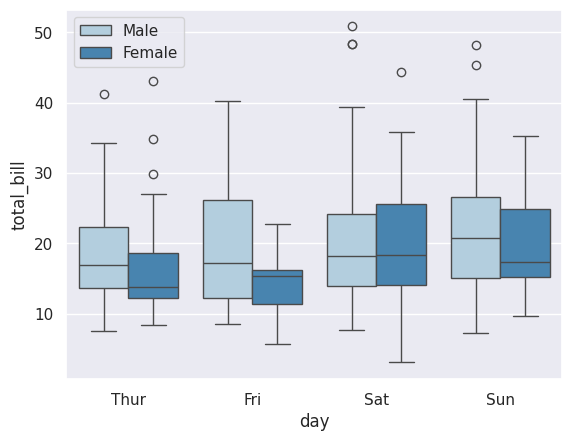

In [ ]:
sns.boxplot(data = tips_df, x = 'day', y ='total_bill', hue = 'sex', palette = 'Blues') # nếu muốn quan tâm thêm nam trả hơn nữ vào từng ngày thì dùng hue
plt.legend(loc=0)  # nếu muốn chữ sex không ở trong label

**Facet Grid **
* can be drawn with up to three dimensions: row, col and hue
* the main approach for visualizating data on this grid is with the FacetGrid.map() method

In [ ]:
tips_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

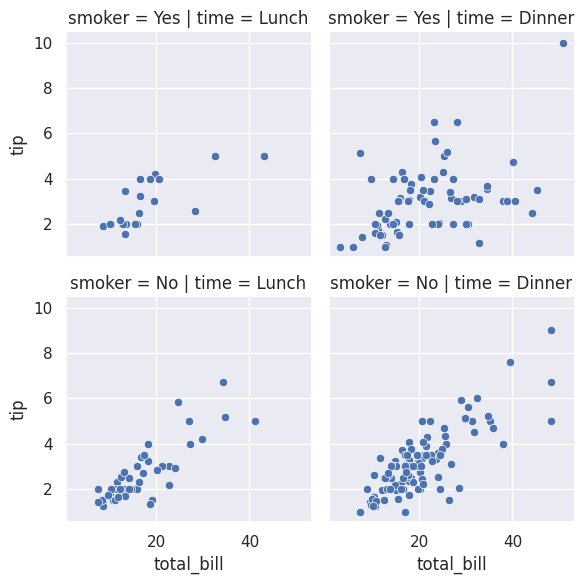

In [ ]:
tips_fg = sns.FacetGrid(data=tips_df, row = 'smoker', col = 'time' ) # create a class instance of Facet Grid class
tips_fg.map(sns.scatterplot, 'total_bill', 'tip')

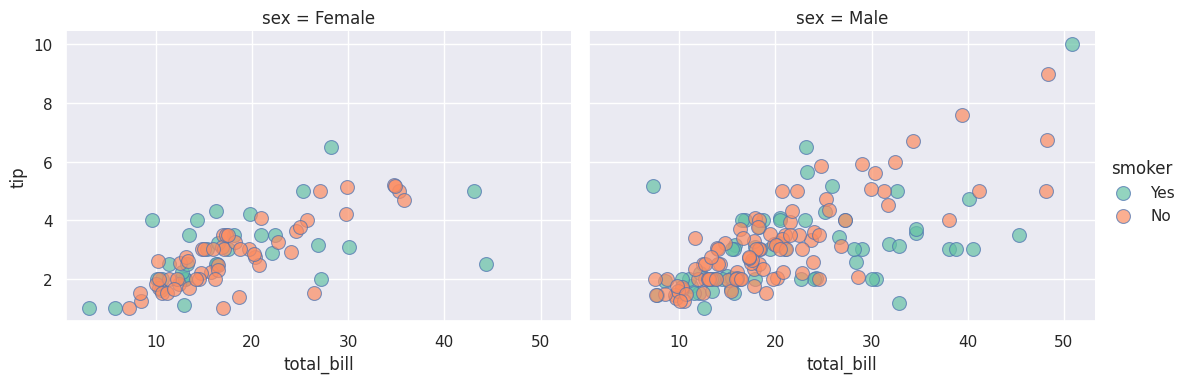

In [ ]:
kws = dict(s = 100, edgecolor = 'b', alpha = .7)
new_fg = sns.FacetGrid(data = tips_df, col = 'sex', hue = 'smoker', col_order = ['Female', 'Male'], palette = 'Set2', height = 4, aspect = 1.4)  # dùng hue để xem trong nam có bao nhiêu người không hút thuốc
# new_fg.map(sns.scatterplot, 'total_bill', 'tip', s = 100, edgecolor = 'b', alpha = .7)  #nếu muốn vòng tròn lớn hơn
new_fg.map(sns.scatterplot, 'total_bill', 'tip', **kws)
new_fg.add_legend()

**Joint Plot **

In [ ]:
penguins_df = sns.load_dataset('penguins')

In [ ]:
penguins_df.head( )

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

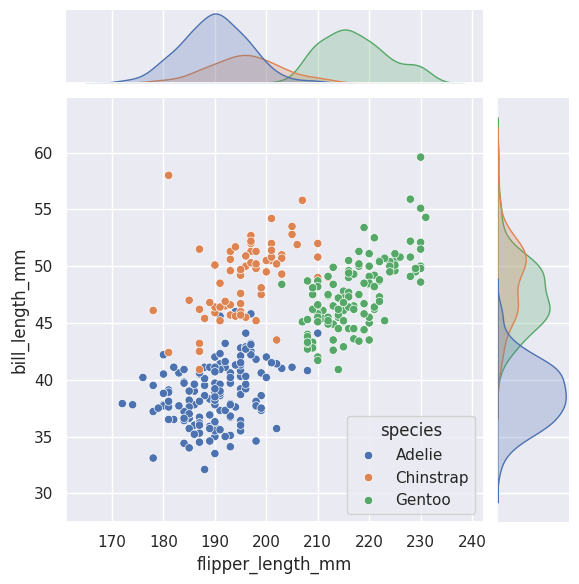

In [ ]:
sns.jointplot(data = penguins_df, x = 'flipper_length_mm', y = 'bill_length_mm', hue = 'species')

**Pair Plot **

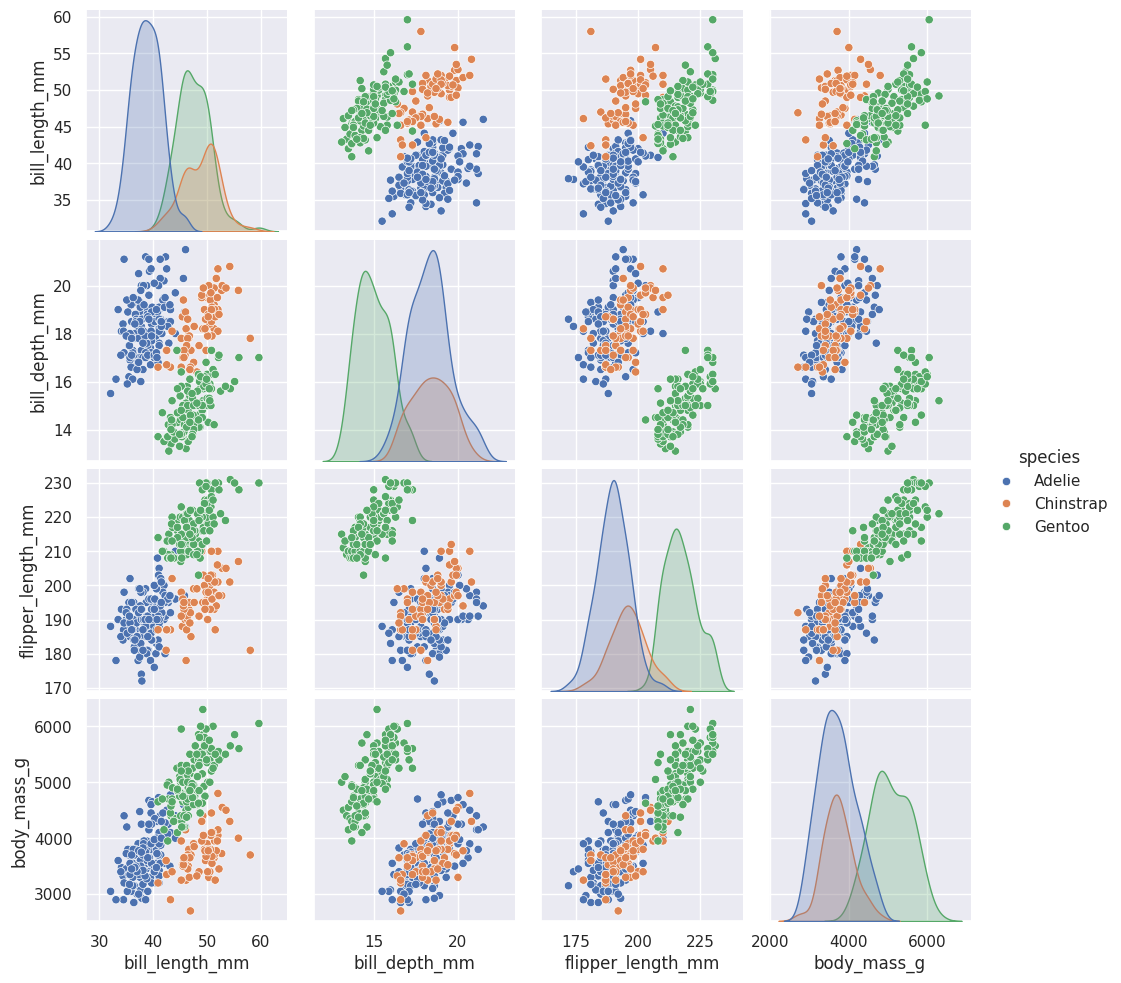

In [ ]:
sns.pairplot(data = penguins_df, hue = 'species')

**Heatmaps **
Describing density or intensity of variables, visualiza patterns, variance, and even anomalies

In [ ]:
flights_df = sns.loat_dataset('fl')

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121